# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [170]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [171]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, [1]].values # [1] because we want numpy 2x2 array not a vector
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


### Feature Scaling Normalization for rnn with sigmoid function

In [172]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [173]:
time_steps = 60
X_train = []
y_train = []
for i in range(time_steps, len(dataset_train)): # 60 for 60 previous stock prices from before
    X_train.append(training_set_scaled[i-time_steps:i, 0]) #Appending 59 stock prices before 60th price
    y_train.append(training_set_scaled[i, 0]) #Apending y_train with next stock price that will be predicted from X_train set
X_train = np.array(X_train)
y_train = np.array(y_train)
print(X_train.shape[0])

1198


### Reshaping

In [174]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [175]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

### Initialising the RNN

In [176]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [177]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1))) # because only 1 input at the time
regressor.add(Dropout(0.2)) #Dropout to prevent overfitting

### Adding a second LSTM layer and some Dropout regularisation

In [178]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [179]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [180]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [181]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [182]:
regressor.compile(optimizer='adam', loss='mean_squared_error') #mean_squared_error for regression

### Fitting the RNN to the Training set

In [183]:
regressor.fit(X_train, y_train, batch_size=32, epochs=100)


Epoch 1/100
38/38 [==============================] - 10s 83ms/step - loss: 0.0330

In [185]:
regressor.save('RNN_Stock_Prices')

INFO:tensorflow:Assets written to: RNN_Stock_Prices\assets


INFO:tensorflow:Assets written to: RNN_Stock_Prices\assets


## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [223]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, [1]].values
print(real_stock_price)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


### Getting the predicted stock price of 2017

In [229]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - time_steps:].values
inputs = inputs.reshape((-1, 1))

inputs = sc.transform(inputs)
X_test = []
for i in range(time_steps, time_steps + len(dataset_test)):
    X_test.append(inputs[i-time_steps:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price_scaled = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price_scaled)
print(predicted_stock_price)

[[783.8573 ]
 [780.98474]
 [781.25037]
 [782.91016]
 [786.64124]
 [793.04236]
 [798.9471 ]
 [801.3616 ]
 [801.5364 ]
 [800.9608 ]
 [800.40955]
 [799.9398 ]
 [799.63025]
 [800.11194]
 [801.10956]
 [805.9622 ]
 [813.4323 ]
 [821.4992 ]
 [825.8904 ]
 [821.38824]]


### Visualising the results

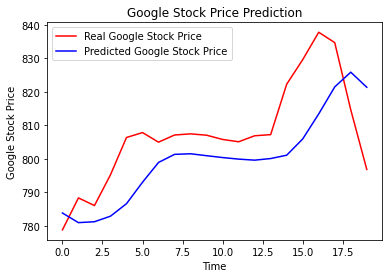

In [230]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()